In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
merged_df = pd.read_csv("C:\\Users\\Professional\\Documents\\docking_11.05.2025\\results\\2025_05_11\\merged_2025_05_11.csv")
merged_df = merged_df.drop(columns = ["Unnamed: 0"])
merged_df["index"] = merged_df["repo_name"] + "-" + merged_df["Filename"]
df = merged_df[["index", "antibody", "variant", "pdb_id", "Kd", "Kd_reference", "fold_change", "log10_fold_change"]]
df

,index,antibody,variant,pdb_id,Kd,Kd_reference,fold_change,log10_fold_change
0,BA.1_8bgg_C-vhh57-2025_05_11-cluster_10_model_...,vhh57,BA.1,8bgg,2.400000e-08,2.800000e-10,85.714,1.933053
1,BA.1_8bgg_C-vhh57-2025_05_11-cluster_10_model_...,vhh57,BA.1,8bgg,1.700000e-08,2.800000e-10,60.714,1.783291
2,BA.1_8bgg_C-vhh57-2025_05_11-cluster_10_model_...,vhh57,BA.1,8bgg,1.700000e-07,2.800000e-10,607.143,2.783291
3,BA.1_8bgg_C-vhh57-2025_05_11-cluster_10_model_...,vhh57,BA.1,8bgg,4.100000e-08,2.800000e-10,146.429,2.165626
4,BA.1_8bgg_C-vhh57-2025_05_11-cluster_1_model_1...,vhh57,BA.1,8bgg,1.700000e-09,2.800000e-10,6.071,0.783291
...,...,...,...,...,...,...,...,...
999,WU_6lzg_B-vhh57-2025_05_11-cluster_8_model_4.pdb,vhh57,WU,6lzg,4.900000e-08,5.190000e-10,94.412,1.975029
1000,WU_6lzg_B-vhh57-2025_05_11-cluster_9_model_1.pdb,vhh57,WU,6lzg,2.600000e-09,5.190000e-10,5.010,0.699806
1001,WU_6lzg_B-vhh57-2025_05_11-cluster_9_model_2.pdb,vhh57,WU,6lzg,1.100000e-08,5.190000e-10,21.195,1.326225
1002,WU_6lzg_B-vhh57-2025_05_11-cluster_9_model_3.pdb,vhh57,WU,6lzg,8.100000e-09,5.190000e-10,15.607,1.193318


In [6]:
# Создаем пустой DataFrame для хранения строк с минимальной разницей
min_diff_df = pd.DataFrame()

for variant in set(df.variant):
    for pdb_id in set(df[df['variant'] == variant].pdb_id):
        for vhh in set(df[(df['variant'] == variant) & (df['pdb_id'] == pdb_id)].antibody):
            cr_df = df[(df['variant'] == variant) & (df['pdb_id'] == pdb_id) & (df['antibody'] == vhh)]
            
            # Создаем новый столбец с разницей между Kd и Kd_reference
            cr_df['Kd_diff'] = abs(cr_df['Kd'] - cr_df['Kd_reference'])
            
            # Находим индекс строки с минимальной разницей
            min_diff_idx = cr_df['Kd_diff'].idxmin()
            
            # Извлекаем строку с минимальной разницей
            min_diff_row = cr_df.loc[[min_diff_idx]]  # Ожидается DataFrame, а не Series
            
            # Используем pd.concat для добавления строки
            min_diff_df = pd.concat([min_diff_df, min_diff_row], ignore_index=False)

# Если нужно сбросить индекс в итоговом DataFrame
min_diff_df = min_diff_df.reset_index(drop=True)

# Печатаем итоговый DataFrame
min_diff_df.to_excel("C:\\Users\\Professional\\Documents\\docking_11.05.2025\\results\\2025_05_11\\min_diff.xlsx")
min_diff_df

C:\Users\Professional\AppData\Local\Temp\ipykernel_15628\351350311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_df['Kd_diff'] = abs(cr_df['Kd'] - cr_df['Kd_reference'])
C:\Users\Professional\AppData\Local\Temp\ipykernel_15628\351350311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_df['Kd_diff'] = abs(cr_df['Kd'] - cr_df['Kd_reference'])
C:\Users\Professional\AppData\Local\Temp\ipykernel_15628\351350311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,index,antibody,variant,pdb_id,Kd,Kd_reference,fold_change,log10_fold_change,Kd_diff
0,WU_6lzg_B-vhh57-2025_05_11-cluster_1_model_2.pdb,vhh57,WU,6lzg,4.900000e-10,5.190000e-10,0.944,-0.024971,2.900000e-11
1,WU_6lzg_B-vhh7-2025_05_11-cluster_5_model_1.pdb,vhh7,WU,6lzg,2.800000e-10,1.370000e-10,2.044,0.310437,1.430000e-10
2,WU_6lzg_B-vhh58-2025_05_11-cluster_3_model_3.pdb,vhh58,WU,6lzg,9.000000e-11,9.310000e-11,0.967,-0.014707,3.100000e-12
3,WU_6vw1_E-vhh57-2025_05_11-cluster_5_model_2.pdb,vhh57,WU,6vw1,5.300000e-10,5.190000e-10,1.021,0.009109,1.100000e-11
4,WU_6vw1_E-vhh7-2025_05_11-cluster_1_model_1.pdb,vhh7,WU,6vw1,8.600000e-11,1.370000e-10,0.628,-0.202222,5.100000e-11
5,WU_6vw1_E-vhh58-2025_05_11-cluster_6_model_2.pdb,vhh58,WU,6vw1,1.100000e-10,9.310000e-11,1.182,0.072443,1.690000e-11
6,WU_6w41_C-vhh7-2025_05_11-cluster_1_model_1.pdb,vhh7,WU,6w41,4.100000e-11,1.370000e-10,0.299,-0.523937,9.600000e-11
7,WU_6w41_C-vhh57-2025_05_11-cluster_1_model_1.pdb,vhh57,WU,6w41,3.800000e-10,5.190000e-10,0.732,-0.135384,1.390000e-10
8,WU_6w41_C-vhh58-2025_05_11-cluster_5_model_4.pdb,vhh58,WU,6w41,8.300000e-11,9.310000e-11,0.892,-0.049872,1.010000e-11
9,WU_7l7e_K-vhh57-2025_05_11-cluster_5_model_4.pdb,vhh57,WU,7l7e,4.900000e-10,5.190000e-10,0.944,-0.024971,2.900000e-11


In [170]:
# path_template = f"/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11/{}/analysis/11_caprieval_analysis/summary/"

paths = {}
for pdb_id in set(min_diff_df.pdb_id):
    variant = {}
    for vhh in set(min_diff_df[min_diff_df['pdb_id'] == pdb_id].antibody):
        index = min_diff_df[(min_diff_df['pdb_id'] == pdb_id) & (min_diff_df['antibody'] == vhh)]['index']
        i = index.values[0].split("-")
        directory = i[0] + "-" + i[1] + "-" + i[2]
        model = i[3]
        chain = i[0].split("_")[-1]
        variant[vhh] = f"/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11/{directory}/analysis/11_caprieval_analysis/summary/{model}"
        variant['chain'] = chain
        
    paths[pdb_id] = variant

paths

{'6vw1': {'vhh58': '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11/WU_6vw1_E-vhh58-2025_05_11/analysis/11_caprieval_analysis/summary/cluster_6_model_2.pdb',
  'chain': 'E',
  'vhh7': '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11/WU_6vw1_E-vhh7-2025_05_11/analysis/11_caprieval_analysis/summary/cluster_1_model_1.pdb',
  'vhh57': '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11/WU_6vw1_E-vhh57-2025_05_11/analysis/11_caprieval_analysis/summary/cluster_5_model_2.pdb'},
 '6w41': {'vhh58': '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11/WU_6w41_C-vhh58-2025_05_11/analysis/11_caprieval_analysis/summary/cluster_5_model_4.pdb',
  'chain': 'C',
  'vhh7': '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11/WU_6w41_C-vhh7-2025_05_11/analysis/11_caprieval_analysis/summary/cluster_1_model_1.pdb',
  'vhh57': '/home/mr-red/Рабочий стол/epitope

In [128]:
from Bio.PDB import PDBParser

def print_chain_ids(input_pdb):
    # Создаем парсер для PDB файла
    parser = PDBParser()
    structure = parser.get_structure("structure", input_pdb)

    # Выводим названия цепей
    for model in structure:
        for chain in model:
            print(f"Chain ID: {chain.id}")

# Пример использования
input_pdb = "renamed_pdbs/6lzg_vhh7_X.pdb"
print_chain_ids(input_pdb)

Chain ID: X
Chain ID: B


/home/mr-red/anaconda3/envs/haddock3/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3153
  warnings.warn(


In [171]:
def rename_and_save_pdbs(paths, chain_mapping, output_dir):
    """
    Для каждого файла PDB в словаре paths:
      1) переименовывает в файле все записи цепи 'H' на цепь, заданную в chain_mapping для каждого ключа vhh.
      2) создаёт директорию output_dir (если не существует) и сохраняет туда переименованные файлы с понятными именами.

    Аргументы:
        paths (dict): вложенный словарь вида {pdb_id: { 'chain': <chain>, vhh_key: <path>, ... }, ...}
        chain_mapping (dict): отображение вида { 'vhh7': 'X', 'vhh57': 'Y', 'vhh58': 'Z' }
        output_dir (str): путь к директории, куда сохранять изменённые файлы.
    """
    # Создаём выходную директорию
    os.makedirs(output_dir, exist_ok=True)

    for pdb_id, info in paths.items():
        for vhh_key, pdb_path in info.items():
            # Пропускаем поле 'chain'
            if vhh_key == 'chain':
                continue

            # Проверяем, есть ли маппинг для данного vhh
            if vhh_key not in chain_mapping:
                print(f"Пропускаю {pdb_path}: нет маппинга для {vhh_key}")
                continue

            new_chain = chain_mapping[vhh_key]
            # Читаем исходный файл
            try:
                with open(pdb_path, 'r') as f_in:
                    lines = f_in.readlines()
            except Exception as e:
                print(f"Не удалось прочитать {pdb_path}: {e}")
                continue

            # Переименовываем цепь только если текущая цепь 'H'
            new_lines = []
            for line in lines:
                if line.startswith(('ATOM  ', 'HETATM', 'ANISOU', 'TER   ')) and len(line) >= 22:
                    # Проверяем, что исходная цепь 'H'
                    if line[21] == 'H':
                        line = line[:21] + new_chain + line[22:]
                new_lines.append(line)

            # Формируем имя выходного файла
            base_name = os.path.basename(pdb_path)
            out_name = f"{pdb_id}_{vhh_key}_{new_chain}.pdb"
            out_path = os.path.join(output_dir, out_name)

            # Сохраняем изменённый файл
            try:
                with open(out_path, 'w') as f_out:
                    f_out.writelines(new_lines)
                print(f"Сохранён {out_path}")
            except Exception as e:
                print(f"Не удалось сохранить {out_path}: {e}")

mapping = {'vhh7': 'X', 'vhh57': 'Y', 'vhh58': 'Z'}
rename_and_save_pdbs(paths, mapping, '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs')

Сохранён /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs/6vw1_vhh58_Z.pdb
Сохранён /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs/6vw1_vhh7_X.pdb
Сохранён /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs/6vw1_vhh57_Y.pdb
Сохранён /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs/6w41_vhh58_Z.pdb
Сохранён /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs/6w41_vhh7_X.pdb
Сохранён /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs/6w41_vhh57_Y.pdb
Сохранён /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs/7l7e_vhh58_Z.pdb
Сохранён /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs/7l7e_vhh7_X.pdb
Сохранён /h

In [172]:
import os
import copy
from Bio.PDB import PDBParser, PDBIO
from Bio.PDB.Structure import Structure
from Bio.PDB.Model import Model

def merge_triplets(paths, renamed_dir, output_dir,
                   vhh_keys=('vhh7','vhh57','vhh58'),
                   antigen_ids=('A','B','C'),
                   vhh_ids=('X','Y','Z')):
    """
    Для каждого pdb_id в paths:
      1) Находит в renamed_dir три PDB-файла по ключам vhh_keys.
      2) Читает все три структуры.
      3) В итоговую структуру добавляет:
           - 3 копии цепи-антигена (по info['chain']), переименовывая
             их в antigen_ids соответственно;
           - 3 VHH-цепи из каждого файла, переименовывая их в vhh_ids соответственно;
           - задаёт каждому парному набору общую segid (SEGID) для группировки.
      4) Сохраняет <pdb_id>_merged.pdb в output_dir.
    """
    os.makedirs(output_dir, exist_ok=True)
    parser = PDBParser(QUIET=True)
    io = PDBIO()

    for pdb_id, info in paths.items():
        antigen_chain = info['chain']

        # 1) собираем ровно три файла
        files = []
        for key in vhh_keys:
            prefix = f"{pdb_id}_{key}_"
            matches = [f for f in os.listdir(renamed_dir)
                       if f.startswith(prefix) and f.endswith('.pdb')]
            if len(matches) != 1:
                print(f"[{pdb_id}] ожидалось 1 файл для {key}, найдено {len(matches)} – пропускаю.")
                files = []
                break
            files.append(os.path.join(renamed_dir, matches[0]))
        if not files:
            continue

        # 2) создаём новую объединённую структуру и модель
        merged = Structure(f"{pdb_id}_merged")
        model = Model(0)
        merged.add(model)

        # 3) для каждого файла: добавляем цепь-антиген и VHH
        for idx, path in enumerate(files):
            struct = parser.get_structure(f"{pdb_id}_{idx}", path)[0]
            pair_tag = f"P{idx+1}"  # общий SEGID для пары

            # антигенная цепь
            if antigen_chain not in struct:
                print(f"[{pdb_id}] цепь '{antigen_chain}' не найдена в {path}")
                continue
            ag_chain = copy.deepcopy(struct[antigen_chain])
            ag_chain.id = antigen_ids[idx]
            ag_chain.segid = pair_tag
            model.add(ag_chain)

            # VHH-цепь: первая неприхотливая
            for ch in struct:
                if ch.id != antigen_chain:
                    vh = copy.deepcopy(ch)
                    vh.id = vhh_ids[idx]
                    vh.segid = pair_tag
                    model.add(vh)
                    break

        # 4) сохраняем объединённый PDB
        out_path = os.path.join(output_dir, f"{pdb_id}_merged.pdb")
        io.set_structure(merged)
        io.save(out_path)
        print(f"[{pdb_id}] сохранён файл с 3 антигенами и 3 VHH: {out_path}")

merge_triplets(paths,
'/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/renamed_pdbs',
'/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/merged_pdbs')

[6vw1] сохранён файл с 3 антигенами и 3 VHH: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/merged_pdbs/6vw1_merged.pdb
[6w41] сохранён файл с 3 антигенами и 3 VHH: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/merged_pdbs/6w41_merged.pdb
[7l7e] сохранён файл с 3 антигенами и 3 VHH: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/merged_pdbs/7l7e_merged.pdb
[8zbq] сохранён файл с 3 антигенами и 3 VHH: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/merged_pdbs/8zbq_merged.pdb
[8y18] сохранён файл с 3 антигенами и 3 VHH: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/merged_pdbs/8y18_merged.pdb
[8xn3] сохранён файл с 3 антигенами и 3 VHH: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/merged_pdbs/8xn3_merged.pdb
[6lzg] сохранён файл с 3 антигенами и 3 VHH: /home/m

In [173]:
from Bio.PDB import PDBParser, PDBIO, Superimposer

def align_merged_pairs(input_dir, output_dir,
                       antigen_ids=('A','B','C'),
                       vhh_ids=('X','Y','Z')):
    """
    Для каждого <pdb_id>_merged.pdb в input_dir:
      1) Читает объединённый файл, где цепи-антигены имеют IDs A,B,C,
         а VHH — X,Y,Z соответственно.
      2) Выравнивает пары 2 и 3 (B+Y, C+Z) по Cα антигенной цепи из пары 1 (A+X).
      3) Сохраняет выровненный PDB в output_dir с тем же именем.
    """
    os.makedirs(output_dir, exist_ok=True)
    parser = PDBParser(QUIET=True)
    io = PDBIO()

    for fname in os.listdir(input_dir):
        if not fname.endswith('_merged.pdb'):
            continue
        path = os.path.join(input_dir, fname)
        struct = parser.get_structure(fname, path)
        model = struct[0]

        # 1) Собираем Cα атомы для каждой антигенной цепи
        ca = {}
        for ag in antigen_ids:
            chain = model[ag]
            ca[ag] = [res['CA'] for res in chain if 'CA' in res]

        # Опорная Cα — для A
        ref_ca = ca[antigen_ids[0]]

        # 2) Для пар B/Y и C/Z выполняем суперпозицию
        for idx in (1, 2):
            ag_id = antigen_ids[idx]
            vh_id = vhh_ids[idx]
            mov_ca = ca[ag_id]
            if len(ref_ca) != len(mov_ca):
                print(f"[{fname}] mismatch CA count in {ag_id}, skipping pair.")
                continue
            sup = Superimposer()
            sup.set_atoms(ref_ca, mov_ca)
            rot, tran = sup.rotran

            # Применяем трансформацию ко всем атомам цепей ag_id и vh_id
            for chain in model:
                if chain.id in (ag_id, vh_id):
                    for atom in chain.get_atoms():
                        atom.transform(rot, tran)

        # 3) Сохраняем выровненный файл
        out_path = os.path.join(output_dir, fname)
        io.set_structure(struct)
        io.save(out_path)
        print(f"Saved aligned {out_path}")

align_merged_pairs(
    '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/merged_pdbs',
    '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/aligned_merged_pdbs'
)

Saved aligned /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/aligned_merged_pdbs/6vw1_merged.pdb
Saved aligned /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/aligned_merged_pdbs/8zbq_merged.pdb
Saved aligned /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/aligned_merged_pdbs/6w41_merged.pdb
Saved aligned /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/aligned_merged_pdbs/8wrl_merged.pdb
Saved aligned /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/aligned_merged_pdbs/8xn3_merged.pdb
Saved aligned /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/aligned_merged_pdbs/6lzg_merged.pdb
Saved aligned /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/aligned_merged_pdbs/8y18_merged.pdb
Saved aligned /home/mr-red/Рабочий стол/epitope_mapping

In [187]:
class KeepChains(Select):
    def __init__(self, keep_chains):
        self.keep_chains = keep_chains

    def accept_chain(self, chain):
        return chain.id in self.keep_chains

def remove_chains(paths, input_dir, output_dir, keep_chain_ids=('A',)):
    """
    Удаляет все цепи, кроме указанных в keep_chain_ids, во всех PDB-файлах из input_dir.
    Результаты сохраняются в output_dir с тем же именем файла.

    :param input_dir: Путь к директории с исходными PDB файлами
    :param output_dir: Путь к директории, куда сохранить очищенные файлы
    :param keep_chain_ids: Кортеж с идентификаторами цепей, которые нужно оставить
    """

    dct = {}
    for k, v in paths.items():
        i = v['vhh7'].split("/")[8].split("-")[0]
        pdb_id = i.split("_")[1]
        dct[pdb_id] = i

    os.makedirs(output_dir, exist_ok=True)
    parser = PDBParser(QUIET=True)
    io = PDBIO()

    for fname in os.listdir(input_dir):
        if not fname.endswith('.pdb'):
            continue

        input_path = os.path.join(input_dir, fname)
        output_path = os.path.join(output_dir, fname)

        replace = output_path.split("/")[-1].split("_")[0]
        output_path = output_path.replace(replace, dct[replace])

        structure = parser.get_structure('pdb', input_path)
        io.set_structure(structure)
        io.save(output_path, KeepChains(keep_chain_ids))

        print(f'Сохранено: {output_path}')

remove_chains(
    paths,
    '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/aligned_merged_pdbs',
    '/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs',
    keep_chain_ids=('A','X','Y','Z',),
)

Сохранено: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/WU_6vw1_E_merged.pdb
Сохранено: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/JN.1_8zbq_F_merged.pdb
Сохранено: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/WU_6w41_C_merged.pdb
Сохранено: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/XBB.1.5_8wrl_B_merged.pdb
Сохранено: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/HV.1_8xn3_B_merged.pdb
Сохранено: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/WU_6lzg_B_merged.pdb
Сохранено: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/JN.1_8y18_B_merged.pdb
Сохранено: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/

In [22]:
import os
from Bio.PDB import PDBParser, PDBIO, Superimposer, Select, Structure, Model, Chain

# Папка с файлами
input_dir = "/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs"
output_path = os.path.join(input_dir, "merged_aligned.pdb")

# Список файлов
pdb_files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith("_merged.pdb")])
if not pdb_files:
    raise FileNotFoundError("No *_merged.pdb files found in directory")

# Парсер и суперинпозиционер
parser = PDBParser(QUIET=True)
sup = Superimposer()

# Заранее подготовим пул ID: A-Z, a-z, 0-9
chain_ids = [chr(i) for i in range(ord('A'), ord('Z')+1)]
chain_ids += [chr(i) for i in range(ord('a'), ord('z')+1)]
chain_ids += [str(i) for i in range(0, 10)]
chain_idx = 0

# Карта: файл -> новые цепи
chain_map = {}

# Загружаем первую структуру как референс
ref_structure = parser.get_structure("ref", pdb_files[0])
ref_chain = [chain for chain in ref_structure.get_chains() if chain.id == 'A'][0]
ref_residues = {res.id: res['CA'] for res in ref_chain if 'CA' in res}

# Подготовим структуру и модель
merged_structure = Structure.Structure('merged')
merged_model = Model.Model(0)
merged_structure.add(merged_model)

# Обрабатываем все PDB-файлы
for pdb_file in pdb_files:
    structure = parser.get_structure(os.path.basename(pdb_file), pdb_file)
    model = next(structure.get_models())

    # Получаем цепь A для выравнивания
    mob_chain = [chain for chain in model if chain.id == 'A'][0]
    mob_residues = {res.id: res['CA'] for res in mob_chain if 'CA' in res}
    common_ids = sorted(set(ref_residues.keys()) & set(mob_residues.keys()), key=lambda x: x[1])
    if len(common_ids) < 3:
        raise ValueError(f"Too few common residues to align for {pdb_file}")

    fixed_atoms = [ref_residues[rid] for rid in common_ids]
    moving_atoms = [mob_residues[rid] for rid in common_ids]

    sup.set_atoms(fixed_atoms, moving_atoms)
    sup.apply(structure.get_atoms())

    # Названия новых цепей для этого файла
    this_file_chains = []

    # Копируем все цепи, включая A
    for chain in model:
        if chain_idx >= len(chain_ids):
            raise ValueError("Insufficient chain IDs in pool")

        new_chain = chain.copy()
        new_chain.id = chain_ids[chain_idx]
        merged_model.add(new_chain)
        this_file_chains.append(chain_ids[chain_idx])
        chain_idx += 1

    # Сохраняем соответствие
    filename = os.path.basename(pdb_file)
    chain_map[filename] = this_file_chains

# Сохраняем PDB
io = PDBIO()
class AcceptAll(Select):
    def accept_residue(self, residue):
        return True
io.set_structure(merged_structure)
io.save(output_path, select=AcceptAll())
print(f"\n✅ Merged and aligned PDB saved to: {output_path}")

# Выводим карту соответствий
print("\n🧬 Chain mapping by file:")
for filename, chains in chain_map.items():
    print(f"{filename} -> chains: {', '.join(chains)}")



✅ Merged and aligned PDB saved to: /home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/merged_aligned.pdb

🧬 Chain mapping by file:
BA.1_8bgg_C_merged.pdb -> chains: A, B, C, D
HV.1_8xn3_B_merged.pdb -> chains: E, F, G, H
JN.1_8y18_B_merged.pdb -> chains: I, J, K, L
JN.1_8zbq_F_merged.pdb -> chains: M, N, O, P
WU_6lzg_B_merged.pdb -> chains: Q, R, S, T
WU_6vw1_E_merged.pdb -> chains: U, V, W, X
WU_6w41_C_merged.pdb -> chains: Y, Z, a, b
WU_7l7e_K_merged.pdb -> chains: c, d, e, f
XBB.1.5_8wrl_B_merged.pdb -> chains: g, h, i, j


In [197]:
import os
import numpy as np
import networkx as nx
from scipy.spatial import KDTree
from Bio.PDB import PDBParser

# Папка с PDB-файлами
input_dir = "/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs"

# Назначения цепей
chain_ids = {"vhh7": "X", "vhh57": "Y", "vhh58": "Z"}

# Настройки
cutoff = 3.5
parser = PDBParser(QUIET=True)

# Функции

def get_chain_termini_coords(structure, chain_id):
    for model in structure:
        for chain in model:
            if chain.id == chain_id:
                residues = [res for res in chain if res.id[0] == ' ']
                if not residues:
                    continue
                try:
                    n_term = residues[0]['N'].coord
                    c_term = residues[-1]['C'].coord
                    return n_term, c_term
                except KeyError:
                    return None, None
    return None, None

def build_surface_graph(coords, cutoff=3.5):
    tree = KDTree(coords)
    G = nx.Graph()
    for i, point in enumerate(coords):
        indices = tree.query_ball_point(point, cutoff)
        for j in indices:
            if i != j:
                dist = np.linalg.norm(coords[i] - coords[j])
                G.add_edge(i, j, weight=dist)
    return G

def find_surface_path(surface_coords, start, end):
    tree = KDTree(surface_coords)
    start_idx = tree.query(start)[1]
    end_idx = tree.query(end)[1]
    G = build_surface_graph(surface_coords)
    path = nx.shortest_path(G, start_idx, end_idx, weight='weight')
    distance = sum(
        np.linalg.norm(surface_coords[path[i]] - surface_coords[path[i+1]])
        for i in range(len(path)-1)
    )
    coords_path = [surface_coords[i] for i in path]
    return distance, coords_path

# Результаты
results = {}  # файл: словарь с расстояниями
trajectories = {}  # файл: словарь с путями

# Обход всех PDB-файлов
for filename in os.listdir(input_dir):
    if not filename.endswith(".pdb"):
        continue

    pdb_path = os.path.join(input_dir, filename)
    structure = parser.get_structure(filename, pdb_path)

    # Получаем терминальные координаты
    termini = {}
    for name, cid in chain_ids.items():
        n_term, c_term = get_chain_termini_coords(structure, cid)
        if n_term is not None and c_term is not None:
            termini[name] = {"N": n_term, "C": c_term}

    if len(termini) < 2:
        print(f"⚠️ Пропущен {filename}: недостаточно цепей с терминусами.")
        continue

    # Собираем "поверхность"
    surface_coords = np.array([atom.coord for atom in structure.get_atoms()])

    file_results = {}
    file_paths = {}

    for name1, data1 in termini.items():
        for name2, data2 in termini.items():
            if name1 == name2:
                continue

            # N → C
            dist_nc, path_nc = find_surface_path(surface_coords, data1["N"], data2["C"])
            file_results[f"{name1}(N) → {name2}(C)"] = dist_nc
            file_paths[f"{name1}(N) → {name2}(C)"] = path_nc

            # C → N
            dist_cn, path_cn = find_surface_path(surface_coords, data1["C"], data2["N"])
            file_results[f"{name1}(C) → {name2}(N)"] = dist_cn
            file_paths[f"{name1}(C) → {name2}(N)"] = path_cn

    results[filename] = file_results
    trajectories[filename] = file_paths

print("\n✅ Готово! Расстояния по поверхности:")
for fname, dists in results.items():
    print(f"\n📄 {fname}")
    for k, v in dists.items():
        print(f"  {k}: {v:.2f} Å")


✅ Готово! Расстояния по поверхности:

📄 JN.1_8y18_B_merged.pdb
  vhh7(N) → vhh57(C): 71.71 Å
  vhh7(C) → vhh57(N): 77.07 Å
  vhh7(N) → vhh58(C): 64.25 Å
  vhh7(C) → vhh58(N): 70.75 Å
  vhh57(N) → vhh7(C): 77.07 Å
  vhh57(C) → vhh7(N): 71.71 Å
  vhh57(N) → vhh58(C): 83.88 Å
  vhh57(C) → vhh58(N): 59.39 Å
  vhh58(N) → vhh7(C): 70.75 Å
  vhh58(C) → vhh7(N): 64.25 Å
  vhh58(N) → vhh57(C): 59.39 Å
  vhh58(C) → vhh57(N): 83.88 Å

📄 HV.1_8xn3_B_merged.pdb
  vhh7(N) → vhh57(C): 91.30 Å
  vhh7(C) → vhh57(N): 84.12 Å
  vhh7(N) → vhh58(C): 60.86 Å
  vhh7(C) → vhh58(N): 64.61 Å
  vhh57(N) → vhh7(C): 84.12 Å
  vhh57(C) → vhh7(N): 91.30 Å
  vhh57(N) → vhh58(C): 72.87 Å
  vhh57(C) → vhh58(N): 101.40 Å
  vhh58(N) → vhh7(C): 64.61 Å
  vhh58(C) → vhh7(N): 60.86 Å
  vhh58(N) → vhh57(C): 101.40 Å
  vhh58(C) → vhh57(N): 72.87 Å

📄 WU_6vw1_E_merged.pdb
  vhh7(N) → vhh57(C): 57.54 Å
  vhh7(C) → vhh57(N): 81.38 Å
  vhh7(N) → vhh58(C): 72.08 Å
  vhh7(C) → vhh58(N): 52.70 Å
  vhh57(N) → vhh7(C): 81.38 Å
  vhh5

In [5]:
import numpy as np
from Bio.PDB import PDBParser
from scipy.spatial import cKDTree
import heapq

VDW_RADII = {'C':1.7, 'N':1.55, 'O':1.52, 'S':1.8, 'H':1.2, 'P':1.8}

def get_chain_termini_coords(structure, chain_id):
    for model in structure:
        for chain in model:
            if chain.id == chain_id:
                residues = [res for res in chain if res.id[0] == ' ']
                if not residues:
                    continue
                try:
                    n_term = residues[0]['N'].coord
                    c_term = residues[-1]['C'].coord
                    return n_term, c_term
                except KeyError:
                    return None, None
    return None, None

def load_atoms(pdb_path):
    parser = PDBParser(QUIET=True)
    struct = parser.get_structure("X", pdb_path)
    coords, radii = [], []
    for atom in struct.get_atoms():
        el = atom.element.strip().capitalize()
        if el in VDW_RADII:
            coords.append(atom.coord)
            radii.append(VDW_RADII[el])
    return np.array(coords), np.array(radii)

def make_voxel_grid(coords, radii, spacing=1.0):
    pad = radii.max() + spacing
    mins = coords.min(axis=0) - pad
    maxs = coords.max(axis=0) + pad
    xs = np.arange(mins[0], maxs[0], spacing)
    ys = np.arange(mins[1], maxs[1], spacing)
    zs = np.arange(mins[2], maxs[2], spacing)
    free = np.ones((len(xs), len(ys), len(zs)), dtype=bool)
    tree = cKDTree(coords)
    
    # Отметим занятые клетки в сетке
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            for k, z in enumerate(zs):
                pt = np.array([x, y, z])
                for idx in tree.query_ball_point(pt, radii.max() + spacing * np.sqrt(3)):
                    if np.linalg.norm(pt - coords[idx]) < radii[idx]:
                        free[i, j, k] = False
                        break
    return (xs, ys, zs), free

def find_nearest_free(idx, free):
    from collections import deque
    shape = free.shape
    visited = set([idx])
    queue = deque([idx])
    if free[idx]:
        return idx
    while queue:
        ci, cj, ck = queue.popleft()
        for di in (-1, 0, 1):
            for dj in (-1, 0, 1):
                for dk in (-1, 0, 1):
                    if di == dj == dk == 0: continue
                    ni, nj, nk = ci + di, cj + dj, ck + dk
                    if (0 <= ni < shape[0] and 0 <= nj < shape[1] and 0 <= nk < shape[2]):
                        if (ni, nj, nk) not in visited:
                            if free[ni, nj, nk]:
                                return (ni, nj, nk)
                            visited.add((ni, nj, nk))
                            queue.append((ni, nj, nk))
    return None  # свободных в радиусе нет

def astar_path_avoiding_surface(s_vox, e_vox, free, surface_vox, radii, coords, xs, ys, zs, spacing):
    shape = free.shape
    def h(a, b):
        return np.linalg.norm((np.array(a) - np.array(b))) * spacing
    
    neighbors = [(dx, dy, dz) for dx in (-1, 0, 1) 
                            for dy in (-1, 0, 1) 
                            for dz in (-1, 0, 1)
                            if not (dx == dy == dz == 0)]
    
    open_set = [(h(s_vox, e_vox), 0.0, s_vox)]
    came_from, gscore, visited = {}, {s_vox: 0.0}, set()
    
    while open_set:
        _, g, cur = heapq.heappop(open_set)
        if cur == e_vox:
            path = []
            while cur in came_from:
                path.append(cur)
                cur = came_from[cur]
            path.append(s_vox)
            return path[::-1], g
        
        if cur in visited:
            continue
        visited.add(cur)
        
        for d in neighbors:
            nb = (cur[0] + d[0], cur[1] + d[1], cur[2] + d[2])
            if not (0 <= nb[0] < shape[0] and 0 <= nb[1] < shape[1] and 0 <= nb[2] < shape[2]):
                continue
            
            # Проверяем, не находится ли клетка внутри радиуса атома
            pt = np.array([xs[nb[0]], ys[nb[1]], zs[nb[2]]])
            for idx in range(len(coords)):
                if np.linalg.norm(pt - coords[idx]) < radii[idx]:
                    continue  # клетка внутри радиуса атома
            
            if not free[nb] or surface_vox[nb]:  # Проверяем, не является ли клетка на поверхности
                continue
            
            tentative = g + np.linalg.norm(d) * spacing
            if tentative < gscore.get(nb, np.inf):
                came_from[nb] = cur
                gscore[nb] = tentative
                f = tentative + h(nb, e_vox)
                heapq.heappush(open_set, (f, tentative, nb))
    
    return None, np.inf

def compute_minimal_avoiding(pdb_path, start, end, spacing=1.0):
    coords, radii = load_atoms(pdb_path)
    (xs, ys, zs), free = make_voxel_grid(coords, radii, spacing)
    
    # Строим поверхность молекулы, где поверхность - это клетки, окружающие атомы
    surface_vox = np.zeros(free.shape, dtype=bool)
    for i in range(free.shape[0]):
        for j in range(free.shape[1]):
            for k in range(free.shape[2]):
                if not free[i, j, k]:  # Если клетка занята атомом
                    # Проверяем соседей и если хотя бы один сосед свободен, то это поверхность
                    for di in (-1, 0, 1):
                        for dj in (-1, 0, 1):
                            for dk in (-1, 0, 1):
                                ni, nj, nk = i + di, j + dj, k + dk
                                if 0 <= ni < free.shape[0] and 0 <= nj < free.shape[1] and 0 <= nk < free.shape[2]:
                                    if free[ni, nj, nk]:  # Сосед свободен
                                        surface_vox[i, j, k] = True
                                        break
    
    def to_vox(pt):
        return (int(round((pt[0] - xs[0]) / spacing)),
                int(round((pt[1] - ys[0]) / spacing)),
                int(round((pt[2] - zs[0]) / spacing)))
    
    s0 = to_vox(start)
    e0 = to_vox(end)
    
    # Если начало/конец заняты — сдвинуть на ближайшую свободную
    s_vox = find_nearest_free(s0, free) or s0
    e_vox = find_nearest_free(e0, free) or e0
    
    path_vox, dist = astar_path_avoiding_surface(s_vox, e_vox, free, surface_vox, radii, coords, xs, ys, zs, spacing)
    
    if path_vox is None:
        print("⚠️ Путь не найден!")
        return None, None
    
    # vox -> coords
    path_coords = [np.array([xs[i], ys[j], zs[k]]) for i, j, k in path_vox]
    
    return dist, path_coords


# === Пример вызова ===
pdb = "/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/HV.1_8xn3_B_merged.pdb"

# Вычисляем терминусы
parser = PDBParser(QUIET=True)
struct = parser.get_structure("X", pdb)
n7, c7 = get_chain_termini_coords(struct, "X")
n57, c57 = get_chain_termini_coords(struct, "Y")

# Пусть start=c7, end=n57
dist, coords_path = compute_minimal_avoiding(pdb, c7, n57, spacing=0.8)
print(f"Distance avoiding atoms: {dist} Å, path length: {len(coords_path)} points")

KeyboardInterrupt: 

In [ ]:
from Bio import PDB

# Словарь радиусов атомов (в ангстремах)
atom_radii = {
    'H': 1.20,  # водород
    'C': 1.70,  # углерод
    'N': 1.55,  # азот
    'O': 1.52,  # кислород
    'S': 1.80,  # сера
    'P': 1.80,  # фосфор
    'F': 1.47,  # фтор
    'Cl': 1.75, # хлор
    'Br': 1.85, # бром
    'I': 1.98  # йод
    # можно добавить другие элементы по мере необходимости
}

# Укажите путь к вашему pdb-файлу
pdb_file = "/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/HV.1_8xn3_B_merged.pdb"

# Создание объекта для парсинга PDB
parser = PDB.PDBParser(QUIET=True)
structure = parser.get_structure("structure", pdb_file)

# Создание пустого словаря для хранения координат атомов по цепям и радиусов
chains_coords = {}

# Функция для получения радиуса атома
def get_atom_radius(atom_name):
    # Для атомов, не включенных в словарь, используем радиус углерода (по умолчанию)
    return atom_radii.get(atom_name, atom_radii['C'])

# Проходим по структуре и извлекаем координаты атомов и их радиусы
for model in structure:
    for chain in model:
        chain_id = chain.get_id()
        if chain_id not in chains_coords:
            chains_coords[chain_id] = []
        for residue in chain:
            for atom in residue:
                coords = atom.get_coord()
                atom_name = atom.get_name()
                atom_radius = get_atom_radius(atom_name)
                chains_coords[chain_id].append((coords, atom_radius))

# Теперь для поиска C- и N-концов для цепей X, Y, Z
ends_coords = {'X': {'N': None, 'C': None},
               'Y': {'N': None, 'C': None},
               'Z': {'N': None, 'C': None}}

# Функция для поиска N- и C-концов для заданной цепи
def find_ends(chain):
    n_terminal = None
    c_terminal = None
    for residue in chain:
        # Определение N- и C-концов по наличию атомов N и C
        if residue.get_resname() == 'N':
            n_terminal = residue
        if residue.get_resname() == 'C':
            c_terminal = residue
    return n_terminal, c_terminal

# Обработка цепей X, Y и Z
for model in structure:
    for chain in model:
        chain_id = chain.get_id()
        if chain_id in ends_coords:
            n_terminal, c_terminal = find_ends(chain)
            if n_terminal:
                ends_coords[chain_id]['N'] = n_terminal.get_coord()
            if c_terminal:
                ends_coords[chain_id]['C'] = c_terminal.get_coord()

# Выводим результат
# print("Координаты атомов и радиусы для всех цепей:")
for chain_id, coords_and_radii in chains_coords.items():
    if chain_id in ["X", "Y", "Z"]:
        ends_coords[chain_id]["N"] = coords_and_radii[0][0]
        ends_coords[chain_id]["C"] = coords_and_radii[-1][0]

print("\nКоординаты N- и C-концов для цепей X, Y и Z:")
for chain_id, ends in ends_coords.items():
    print(f"Цепь {chain_id}: N-конец - {ends['N']}, C-конец - {ends['C']}")




Траектория между X-Y:
[44.073  7.086  1.133]
[43.15635    7.301348   1.4697038]
[42.239693   7.516697   1.8064075]
[41.323036   7.732045   2.1431112]
[40.406384  7.947394  2.479815]
[39.48973    8.162743   2.8165188]
[38.573074   8.378091   3.1532226]
[37.656418   8.593439   3.4899263]
[36.739765  8.808787  3.82663 ]
[35.823112  9.024137  4.163334]
[34.906456   9.239485   4.5000377]
[33.9898     9.454833   4.8367414]
[33.073147   9.670181   5.1734447]
[32.156494   9.88553    5.5101485]
[31.239838  10.100879   5.8468523]
[30.323183 10.316227  6.183556]
[29.406528 10.531575  6.52026 ]
[28.489874  10.746923   6.8569636]
[27.57322   10.962273   7.1936674]
[26.656565 11.177621  7.530371]
[25.73991  11.392969  7.867075]
[24.823256 11.608318  8.203779]
[23.9066    11.823666   8.5404825]
[22.989946 12.039015  8.877187]
[22.073292 12.254363  9.21389 ]
[21.156637 12.469711  9.550594]
[20.239983  12.6850605  9.887298 ]
[19.323328 12.900409 10.224002]
[18.406673 13.115757 10.560705]
[17.490019 13

In [ ]:
import numpy as np

# Функция для вычисления расстояния между двумя точками в 3D пространстве
def calculate_distance(coord1, coord2):
    return np.linalg.norm(np.array(coord1) - np.array(coord2))

# Функция для вычисления нормализованного вектора направления между двумя точками
def normalize_vector(coord1, coord2):
    vector = np.array(coord2) - np.array(coord1)
    distance = np.linalg.norm(vector)
    if distance == 0:
        return None  # Точки совпадают, нет направления
    return vector / distance  # Нормализованный вектор

# Функция для построения траектории из точек с шагом 1 ангстрем
def build_trajectory(start, end, step_size=1.0):
    trajectory = []
    direction = normalize_vector(start, end)
    if direction is None:
        return trajectory
    # Расстояние между точками
    distance = calculate_distance(start, end)
    # Количество шагов
    num_steps = int(np.floor(distance / step_size))
    for i in range(num_steps + 1):
        point = start + direction * i * step_size
        trajectory.append(point)
    return trajectory

# Построение траектории для C-конца и N-конца каждой цепи
trajectories = {'X-Y': [], 'X-Z': [], 'Y-X': [], 'Y-Z': [], 'Z-X': [], 'Z-Y': []}

# Траектория от C-конца одной цепи до N-конца другой
for chain1, chain2 in [('X', 'Y'), ('X', 'Z'), ('Y', 'X'), ('Y', 'Z'), ('Z', 'X'), ('Z', 'Y')]:
    start = ends_coords[chain1]['C']
    end = ends_coords[chain2]['N']
    trajectory = build_trajectory(np.array(start), np.array(end))
    trajectories[f'{chain1}-{chain2}'] = trajectory

# Вывод траектории
for key, trajectory in trajectories.items():
    print(f"\nТраектория между {key}:")
    for point in trajectory:
        print(f"{point}")

In [12]:
import numpy as np
import MDAnalysis as mda
import trimesh
import networkx as nx

# 1. Загрузить структуру
u = mda.Universe("/home/mr-red/Рабочий стол/epitope_mapping/docking_11.05.2025/results/2025_05_11_best/stripped_pdbs/HV.1_8xn3_B_merged.pdb")
# Предположим, что VHH X — цепь 'X', VHH Y — 'Y', АГА — 'A'
start = u.select_atoms("chain X and name C")   # C-конец первой цепи
end   = u.select_atoms("chain Y and name N")   # N-конец второй цепи

p_start = start.positions[0]
p_end   = end.positions[0]

# 2. Построить поверхность всего комплекса
# Собираем все атомы и генерируем поверхностный меш
atoms = np.vstack([ag.positions for ag in u.atoms])
cloud = trimesh.points.PointCloud(atoms)
hull  = cloud.convex_hull       # грубая аппроксимация, можно заменить на MSMS

# 3. Создать объемную сетку
bounds = hull.bounds + np.array([[-5, -5, -5],[5,5,5]])  # расширить границы
grid_x, grid_y, grid_z = np.mgrid[
    bounds[0,0]:bounds[1,0]:50j,
    bounds[0,1]:bounds[1,1]:50j,
    bounds[0,2]:bounds[1,2]:50j]
points = np.vstack([grid_x.ravel(), grid_y.ravel(), grid_z.ravel()]).T

# Отфильтровать узлы, лежащие вне меша + на поверхности
mask = ~hull.contains(points)
free_pts = points[mask]

tree = cKDTree(free_pts)

# 2. Ищем индекс ближайшего узла к p_start и p_end
#    query возвращает (distance, index)
_, start_idx = tree.query(p_start)
_, end_idx   = tree.query(p_end)

# 4. Построить граф узлов
G = nx.grid_graph(dim=[50,50,50])  # пример 6-связной 50×50×50
# Здесь нужно сопоставить индексы G.nodes → координаты free_pts
# и убрать узлы, которые не в free_pts (т.е. пересекаются с мешем)

# 5. Найти кратчайший путь
# start_idx и end_idx — индексы ближайших к p_start/p_end свободных узлов
path = nx.astar_path(G, start_idx, end_idx, heuristic=lambda a,b: np.linalg.norm(free_pts[a]-free_pts[b]))

# 6. Визуализация
# В PyMOL можно вывести path как псевдо-атомы:
# pymol.cmd.load_traj(path_coords, object='path', format='xyz')


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
pip uninstall MDAnalysis


Usage:   
  /home/mr-red/anaconda3/envs/haddock3/bin/python -m pip uninstall [options] <package> ...
  /home/mr-red/anaconda3/envs/haddock3/bin/python -m pip uninstall [options] -r <requirements file> ...

no such option: -Y
Note: you may need to restart the kernel to use updated packages.


NameError: name 'chains_coords' is not defined

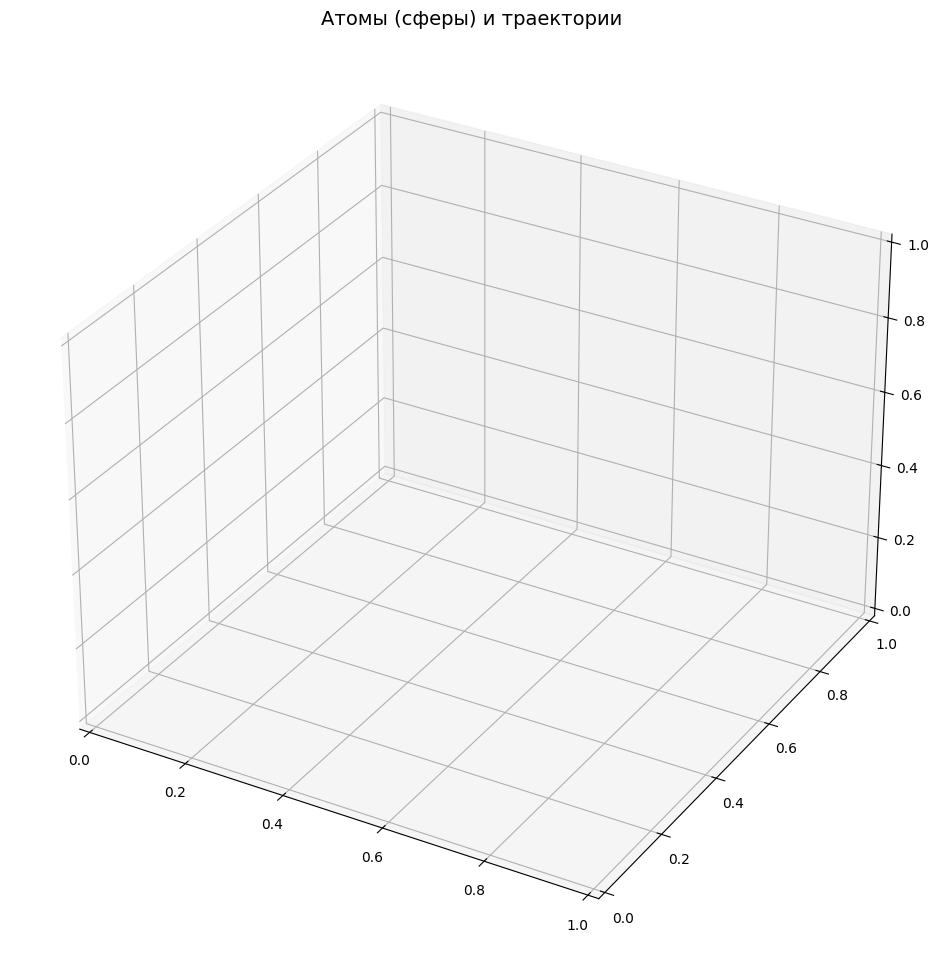

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Цвета цепей
chain_colors = {
    'X': 'red',
    'Y': 'green',
    'Z': 'blue',
    'A': 'gold'  # Добавим отображение цепи A
}

# Цвета траекторий
trajectory_colors = {
    'X-Y': 'purple',
    'X-Z': 'orange',
    'Y-X': 'cyan',
    'Y-Z': 'magenta',
    'Z-X': 'brown',
    'Z-Y': 'grey'
}

# Функция рисования сферы (атома)
def plot_sphere(ax, center, radius, color, resolution=6, alpha=0.5):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = radius * np.outer(np.cos(u), np.sin(v)) + center[0]
    y = radius * np.outer(np.sin(u), np.sin(v)) + center[1]
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v)) + center[2]
    ax.plot_surface(x, y, z, color=color, alpha=alpha, linewidth=0)

# Создание 3D фигуры
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Атомы (сферы) и траектории", fontsize=14)

# Вывод атомов как сфер для цепей X, Y, Z, A
for chain_id, atoms in chains_coords.items():
    if chain_id in ['X', 'Y', 'Z', 'A']:
        color = chain_colors.get(chain_id, 'gray')
        for coord, radius in atoms:
            plot_sphere(ax, coord, radius, color=color, alpha=0.4)

# Визуализация траекторий (если есть)
for key, trajectory in trajectories.items():
    trajectory = np.array(trajectory)
    if len(trajectory) > 0:
        ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2],
                color=trajectory_colors.get(key, 'black'),
                linewidth=2, label=f'Траектория {key}')

# Настройки отображения
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
ax.view_init(elev=25, azim=40)  # Угол просмотра
plt.tight_layout()
plt.show()

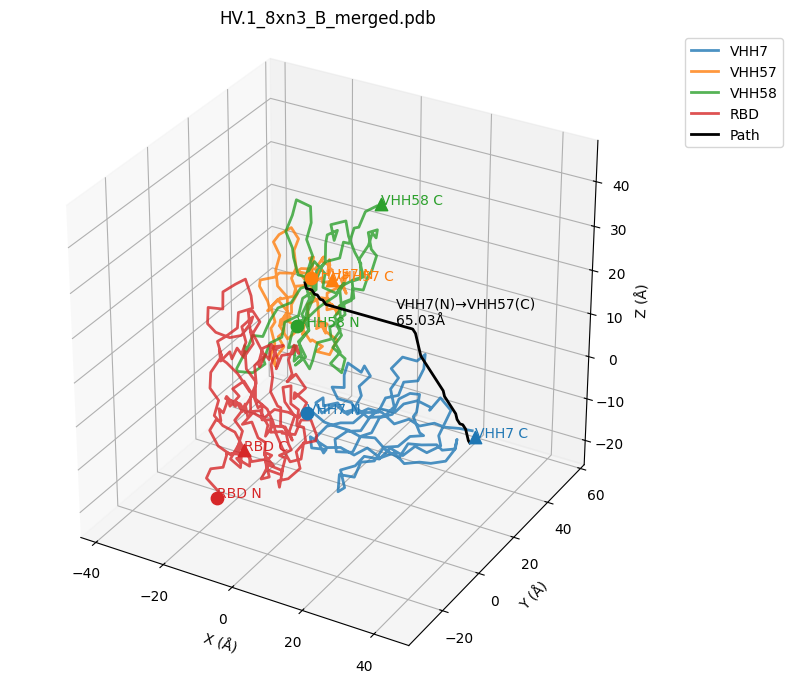

In [269]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Bio.PDB import PDBParser

def plot_minimal_avoiding_path(pdb_path, path_coords, distance=None, chain_ids=None):
    """
    Визуализация:
      - Cα-трасса всех цепей (упрощённый cartoon) разных цветов,
      - N- и C-концы VHH и антигенной цепей с подписями,
      - минимальный A*-путь path_coords с единственной подписью.

    :param pdb_path: путь к PDB-файлу
    :param path_coords: список точек пути [(x,y,z), ...] или None
    :param distance: float, расстояние пути для подписи
    :param chain_ids: dict, e.g. {"vhh7":"X","vhh57":"Y","vhh58":"Z","antigen":"A"}
    """
    # Стандартные цепи, если не переданы
    if chain_ids is None:
        chain_ids = {"vhh7":"X","vhh57":"Y","vhh58":"Z","RBD":"A"}

    # Цвета для цепей
    colors = {
        "vhh7": "#1f77b4",
        "vhh57": "#ff7f0e",
        "vhh58": "#2ca02c",
        "RBD": "#d62728"
    }

    # Парсим PDB
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("M", pdb_path)[0]

    # Cα-трассы
    ca_traces = {}
    for label, cid in chain_ids.items():
        if cid in structure:
            coords = [res['CA'].coord for res in structure[cid] if 'CA' in res and res.id[0]==' ']
            if coords:
                ca_traces[label] = np.array(coords)

    # Терминусы
    ends = {}
    for label, cid in chain_ids.items():
        if cid in structure:
            residues = [r for r in structure[cid] if r.id[0]==' ']
            if residues and 'N' in residues[0] and 'C' in residues[-1]:
                ends[label] = {
                    'N': residues[0]['N'].coord,
                    'C': residues[-1]['C'].coord
                }

    # Рисование
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((1,1,1))

    # Рисуем Cα-трассы с цветами и легендой
    for label, trace in ca_traces.items():
        ax.plot(
            trace[:,0], trace[:,1], trace[:,2],
            color=colors.get(label, 'gray'), linewidth=2, alpha=0.8,
            label=label.upper()
        )

    # Рисуем терминусы
    for label, pts in ends.items():
        Npt, Cpt = pts['N'], pts['C']
        col = colors.get(label, 'gray')
        ax.scatter(*Npt, color=col, s=80, marker='o')
        ax.text(*Npt, f"{label.upper()} N", color=col)
        ax.scatter(*Cpt, color=col, s=80, marker='^')
        ax.text(*Cpt, f"{label.upper()} C", color=col)

    # Рисуем путь, если он корректный список
    if isinstance(path_coords, (list, np.ndarray)) and len(path_coords) > 0:
        P = np.array(path_coords)
        if P.ndim == 2 and P.shape[1] == 3:
            ax.plot(P[:,0], P[:,1], P[:,2], c='black', linewidth=2, label='Path')
            # подпись в середине пути
            mid = P[len(P)//2]
            if distance is not None:
                txt = f"{list(chain_ids.keys())[0].upper()}(N)→{list(chain_ids.keys())[1].upper()}(C)\n{distance:.2f}Å"
            else:
                txt = f"Path"
            ax.text(mid[0], mid[1], mid[2], txt, color='black', fontsize=10)
        else:
            print("⚠️ Неверный формат path_coords, путь не отображен")
    else:
        print("⚠️ path_coords пуст или несоответствующего типа, путь не отображен")

    ax.set_title(os.path.basename(pdb_path))
    ax.set_xlabel("X (Å)")
    ax.set_ylabel("Y (Å)")
    ax.set_zlabel("Z (Å)")
    ax.legend(loc='upper left', bbox_to_anchor=(1.05,1))
    plt.tight_layout()
    plt.show()

plot_minimal_avoiding_path(pdb, coords_path, distance=dist)

In [270]:
import os
import numpy as np
from Bio.PDB import PDBParser
import plotly.graph_objects as go

def plotly_minimal_avoiding_path(pdb_path, path_coords, distance=None, chain_ids=None):
    """
    Интерактивная 3D-визуализация с Plotly:
      - Cα-трассы цепей разного цвета,
      - N- и C-концы с подписями,
      - A* путь (черная линия) с одной подписью.

    :param pdb_path: путь к PDB-файлу
    :param path_coords: список точек пути [(x,y,z), ...]
    :param distance: float, дистанция пути для подписи
    :param chain_ids: dict, например {"vhh7":"X","vhh57":"Y","vhh58":"Z","RBD":"A"}
    """
    if chain_ids is None:
        chain_ids = {"vhh7":"X","vhh57":"Y","vhh58":"Z","RBD":"A"}
    colors = {"vhh7":"blue","vhh57":"orange","vhh58":"green","RBD":"red"}
    parser = PDBParser(QUIET=True)
    struct = parser.get_structure("M", pdb_path)[0]

    fig = go.Figure()

    # Cα-трассы
    for label, cid in chain_ids.items():
        if cid in struct:
            ca = np.array([res["CA"].coord
                           for res in struct[cid]
                           if "CA" in res and res.id[0]==" "])
            if ca.size:
                fig.add_trace(go.Scatter3d(
                    x=ca[:,0], y=ca[:,1], z=ca[:,2],
                    mode="lines",
                    line=dict(color=colors[label], width=4),
                    name=label.upper()
                ))

    # Терминусы
    for label, cid in chain_ids.items():
        if cid in struct:
            resl = [r for r in struct[cid] if r.id[0]==" "]
            if resl and "N" in resl[0] and "C" in resl[-1]:
                N = resl[0]["N"].coord
                C = resl[-1]["C"].coord
                # N-терминус: круг
                fig.add_trace(go.Scatter3d(
                    x=[N[0]], y=[N[1]], z=[N[2]],
                    mode="markers+text",
                    marker=dict(size=6, symbol="circle", color=colors[label]),
                    text=[f"{label.upper()} N"],
                    textposition="top center",
                    showlegend=False
                ))
                # C-терминус: ромб
                fig.add_trace(go.Scatter3d(
                    x=[C[0]], y=[C[1]], z=[C[2]],
                    mode="markers+text",
                    marker=dict(size=6, symbol="diamond", color=colors[label]),
                    text=[f"{label.upper()} C"],
                    textposition="bottom center",
                    showlegend=False
                ))

    # A* путь
    if isinstance(path_coords, (list, np.ndarray)) and len(path_coords)>0:
        P = np.array(path_coords)
        fig.add_trace(go.Scatter3d(
            x=P[:,0], y=P[:,1], z=P[:,2],
            mode="lines",
            line=dict(color="black", width=6),
            name="A* path"
        ))
        # подпись посередине
        if distance is not None:
            mid = P[len(P)//2]
            fig.add_trace(go.Scatter3d(
                x=[mid[0]], y=[mid[1]], z=[mid[2]],
                mode="text",
                text=[f"{list(chain_ids.keys())[0].upper()}(N)→"
                      f"{list(chain_ids.keys())[1].upper()}(C) = {distance:.2f}Å"],
                textposition="middle center",
                showlegend=False
            ))

    fig.update_layout(
        scene=dict(
            xaxis_title="X (Å)",
            yaxis_title="Y (Å)",
            zaxis_title="Z (Å)"
        ),
        width=800,
        margin=dict(r=0, l=0, b=0, t=30),
        legend=dict(x=1.05, y=0.9)
    )

    fig.show()

plotly_minimal_avoiding_path(
    pdb,
    path_coords,
    distance=dist,
    chain_ids={"vhh7":"X","vhh57":"Y","vhh58":"Z","RBD":"A"}
)

In [218]:
pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
Note: you may need to restart the kernel to use updated packages.
